Для моделі (1) знайти чисельний розв’язок системи, побудувати графіки розв’язків, фазовий
портрет (X-Y-Z) та проекції фазового портрету на площини Z-X, Z-Y, Y-X для наведених
вище значень параметрів на інтервалі
t 0,50
для 1000 та 5000 ітерацій за допомогою
функцій rkfixed (або rkadapt) MathCad для початкових значень x=10, y=10, z=10.

In [43]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [44]:
sigma = 10
b = 8/3
r = 28

In [45]:
x0, y0, z0 = 10, 10, 10

In [46]:
t0, t1 = 0, 50

In [47]:
def lorenz(t, v):
    x, y, z = v
    dx = -sigma*x + sigma*y
    dy = -x*z + r*x - y
    dz = x*y - b*z
    return [dx, dy, dz]

In [48]:
def solve_lorenz(n_steps):
    t_eval = np.linspace(t0, t1, n_steps)
    sol = solve_ivp(lorenz, [t0, t1], [x0, y0, z0], t_eval=t_eval)
    return sol.t, sol.y[0], sol.y[1], sol.y[2]

In [49]:
cases = [(1000, "1000 кроків"), (5000, "5000 кроків")]

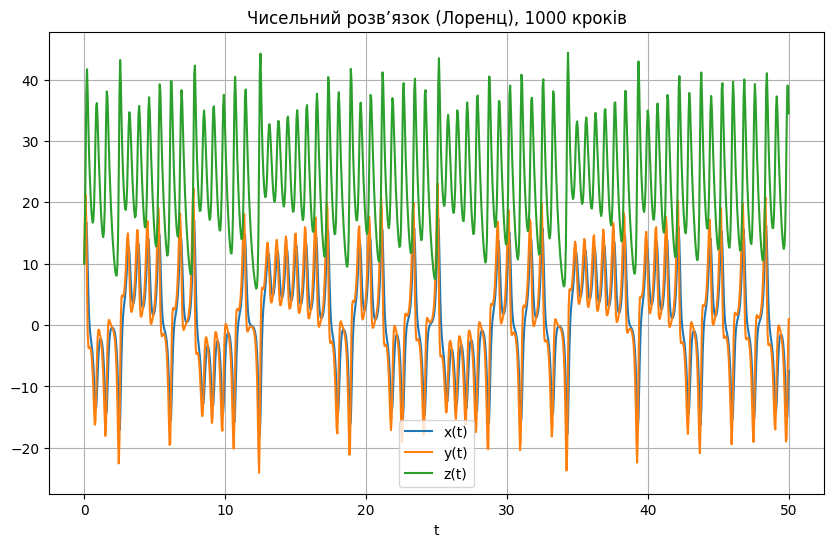

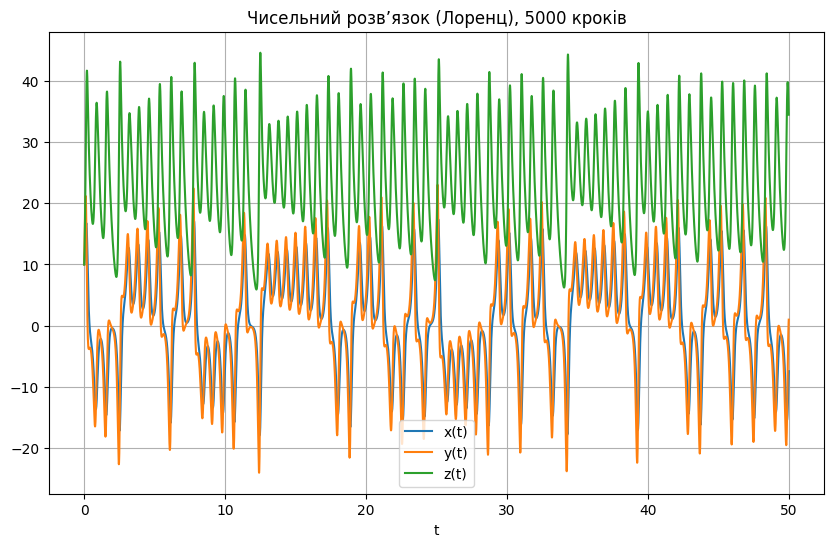

In [50]:
for n, label in cases:
    t, x, y, z = solve_lorenz(n)

    # --- Графіки X(t), Y(t), Z(t) ---
    plt.figure(figsize=(10, 6))
    plt.plot(t, x, label="x(t)")
    plt.plot(t, y, label="y(t)")
    plt.plot(t, z, label="z(t)")
    plt.title(f"Чисельний розв’язок (Лоренц), {label}")
    plt.xlabel("t")
    plt.legend()
    plt.grid()
    plt.show()

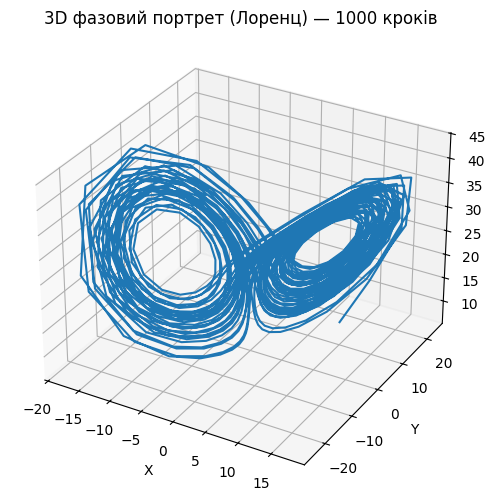

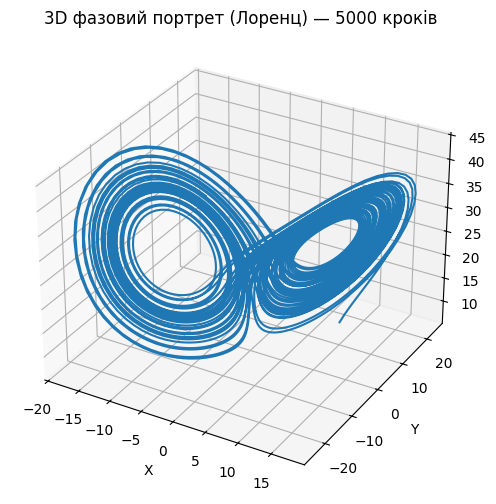

In [51]:
for n, label in cases:
    t, x, y, z = solve_lorenz(n)
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection="3d")
    ax.plot(x, y, z)
    ax.set_title(f"3D фазовий портрет (Лоренц) — {label}")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    plt.show()

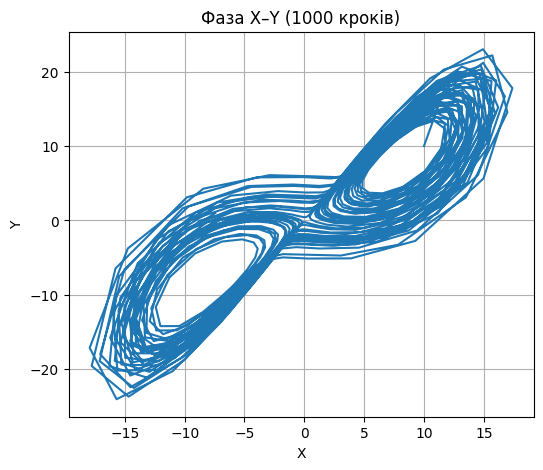

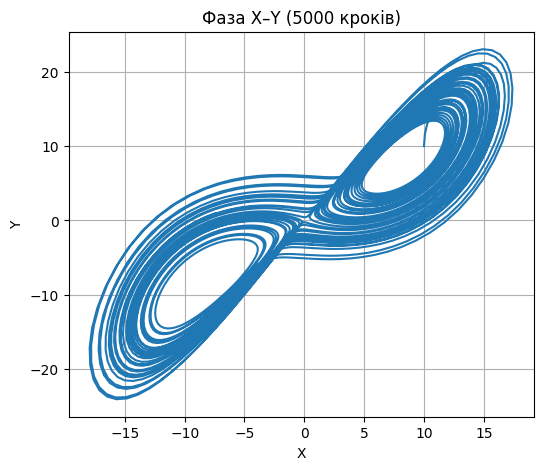

In [52]:
for n, label in cases:
    t, x, y, z = solve_lorenz(n)

    plt.figure(figsize=(6, 5))
    plt.plot(x, y)
    plt.title(f"Фаза X–Y ({label})")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid()
    plt.show()

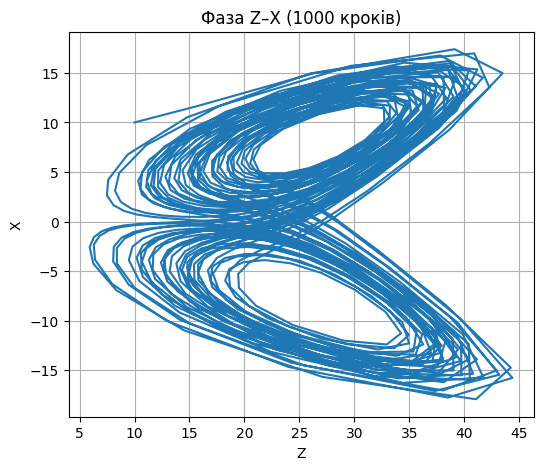

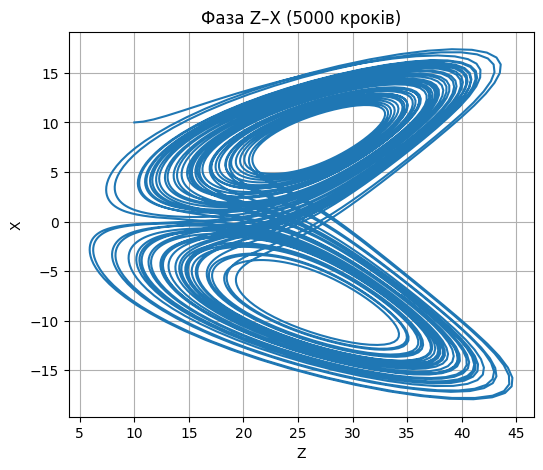

In [53]:
for n, label in cases:
    t, x, y, z = solve_lorenz(n)
    # --- Проєкція Z–X ---
    plt.figure(figsize=(6, 5))
    plt.plot(z, x)
    plt.title(f"Фаза Z–X ({label})")
    plt.xlabel("Z")
    plt.ylabel("X")
    plt.grid()
    plt.show()

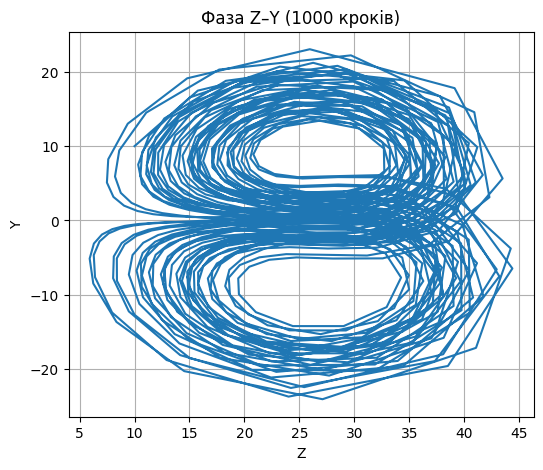

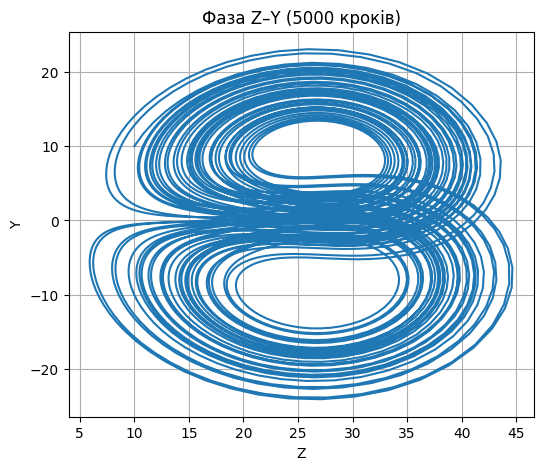

In [54]:
for n, label in cases:
    t, x, y, z = solve_lorenz(n)
    # --- Проєкція Z–Y ---
    plt.figure(figsize=(6, 5))
    plt.plot(z, y)
    plt.title(f"Фаза Z–Y ({label})")
    plt.xlabel("Z")
    plt.ylabel("Y")
    plt.grid()
    plt.show()

Повторити розрахунки та аналіз згідно варіанту завдання (k – остання цифра № за списком в електронному журналі = 3
а)r = 1 + k,
б)r = 21 - k .

In [55]:
r_values_from_journal = [4, 18, 28]

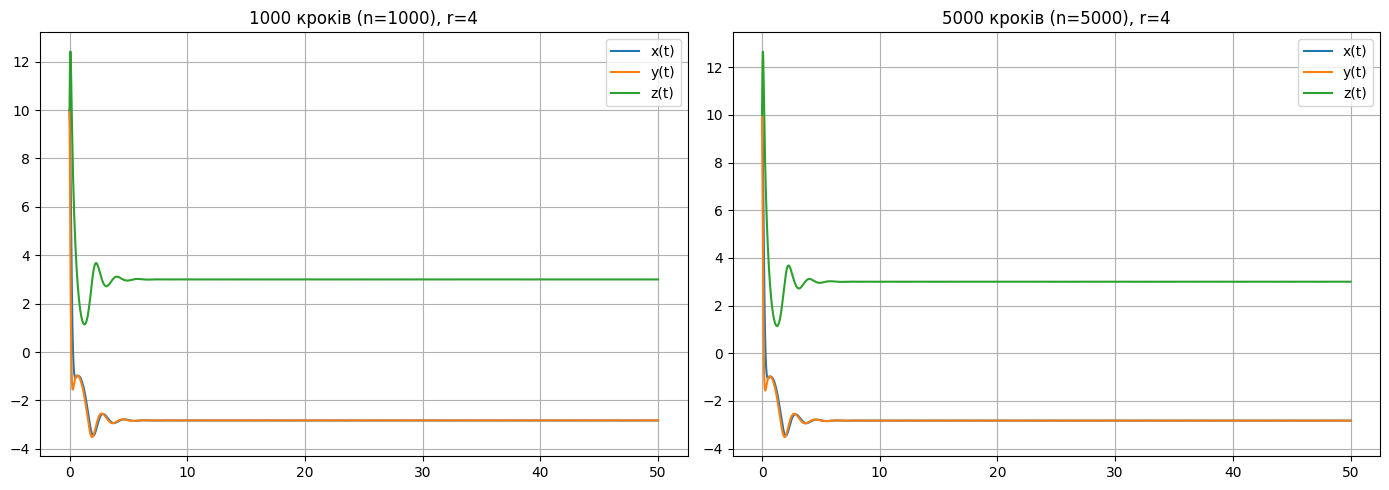

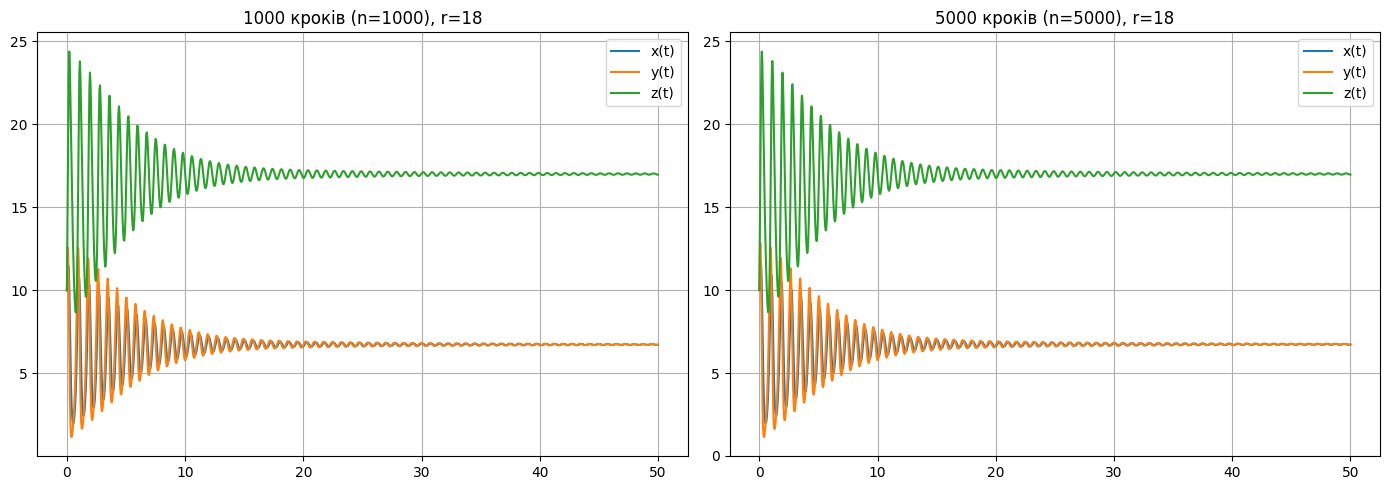

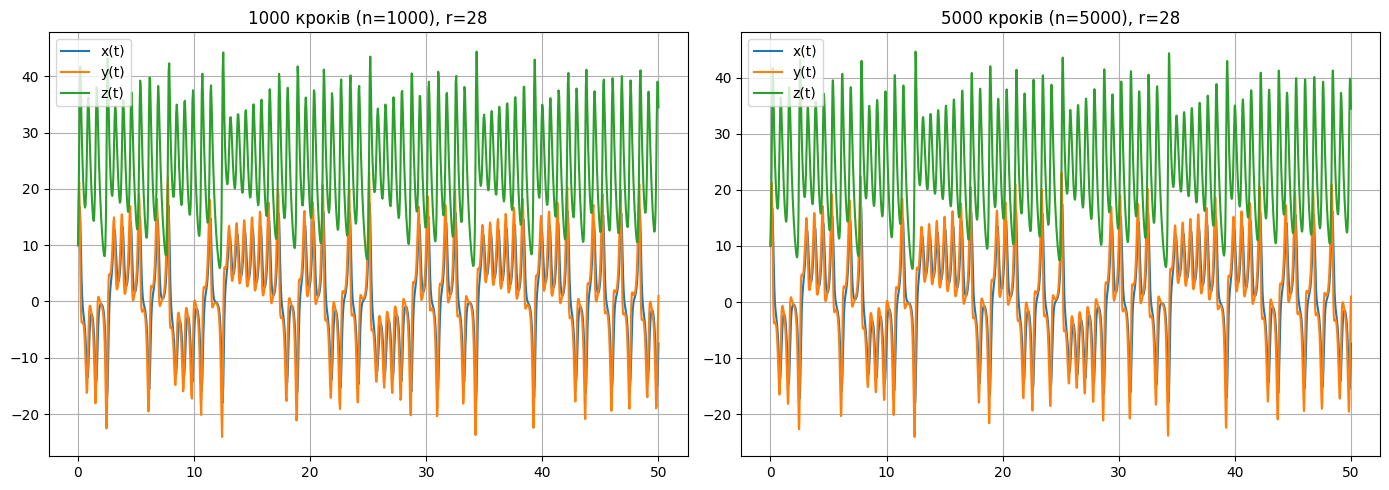

In [56]:
for r in r_values_from_journal:
    def lorenz(t, v):
        x, y, z = v
        dx = -sigma*x + sigma*y
        dy = -x*z + r*x - y
        dz = x*y - b*z
        return [dx, dy, dz]

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # --- 1000 кроків ---
    n, label = cases[0]
    t, x, y, z = solve_lorenz(n)
    axes[0].plot(t, x, label="x(t)")
    axes[0].plot(t, y, label="y(t)")
    axes[0].plot(t, z, label="z(t)")
    axes[0].set_title(f"{label} (n={n}), r={r}")
    axes[0].grid()
    axes[0].legend()

    # --- 5000 кроків ---
    n, label = cases[1]
    t, x, y, z = solve_lorenz(n)
    axes[1].plot(t, x, label="x(t)")
    axes[1].plot(t, y, label="y(t)")
    axes[1].plot(t, z, label="z(t)")
    axes[1].set_title(f"{label} (n={n}), r={r}")
    axes[1].grid()
    axes[1].legend()

    plt.tight_layout()
    plt.show()

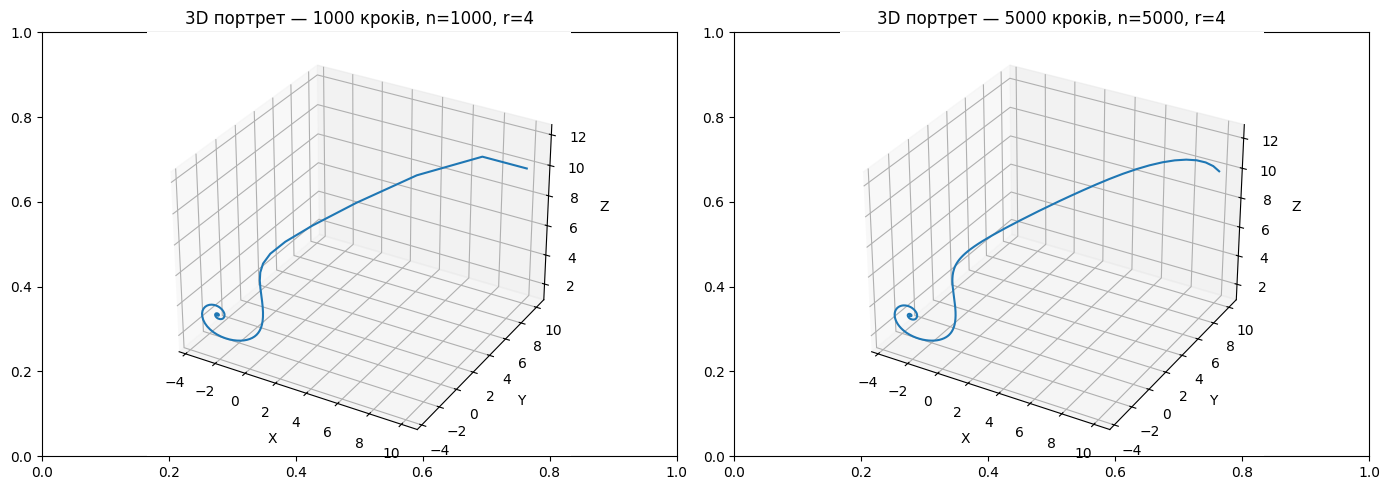

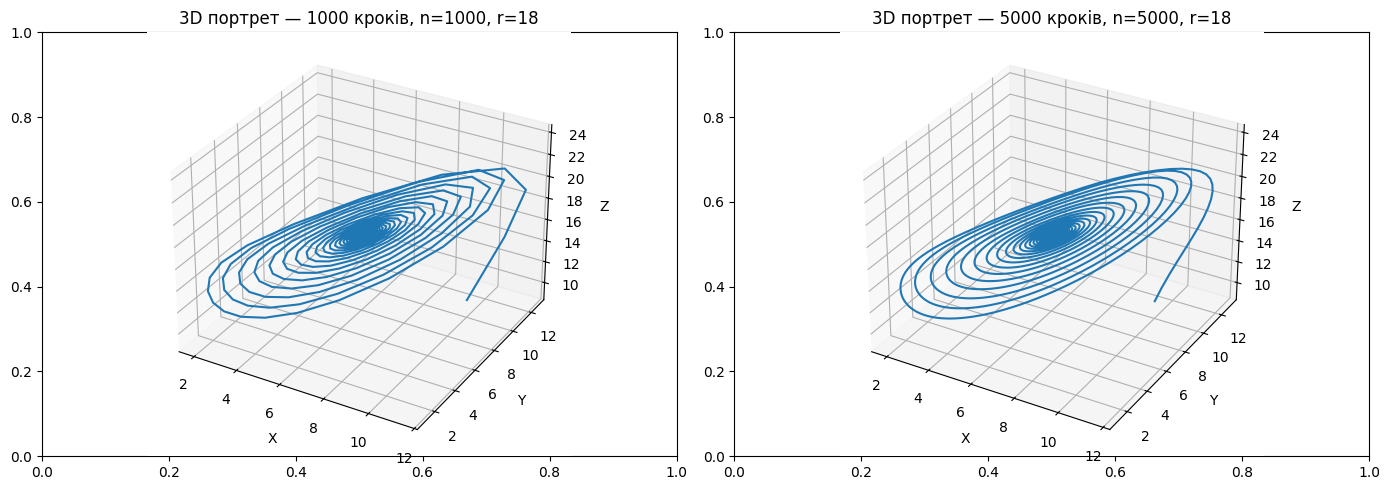

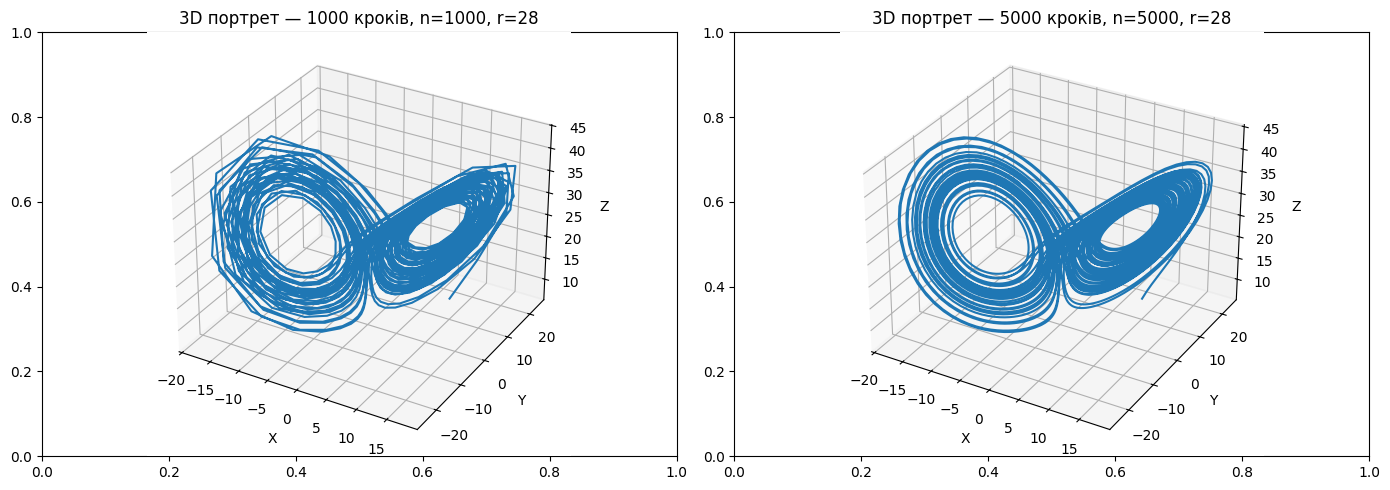

In [57]:
for r in r_values_from_journal:
    def lorenz(t, v):
        x, y, z = v
        dx = -sigma*x + sigma*y
        dy = -x*z + r*x - y
        dz = x*y - b*z
        return [dx, dy, dz]

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

     # --- 1000 кроків ---
    n1, label1 = cases[0]
    t1_sol, x1, y1, z1 = solve_lorenz(n1)

    ax1 = fig.add_subplot(1, 2, 1, projection="3d")
    ax1.plot(x1, y1, z1)
    ax1.set_title(f"3D портрет — {label1}, n={n1}, r={r}")
    ax1.set_xlabel("X")
    ax1.set_ylabel("Y")
    ax1.set_zlabel("Z")

    # --- 5000 кроків ---
    n2, label2 = cases[1]
    t2_sol, x2, y2, z2 = solve_lorenz(n2)

    ax2 = fig.add_subplot(1, 2, 2, projection="3d")
    ax2.plot(x2, y2, z2)
    ax2.set_title(f"3D портрет — {label2}, n={n2}, r={r}")
    ax2.set_xlabel("X")
    ax2.set_ylabel("Y")
    ax2.set_zlabel("Z")

    plt.tight_layout()
    plt.show()

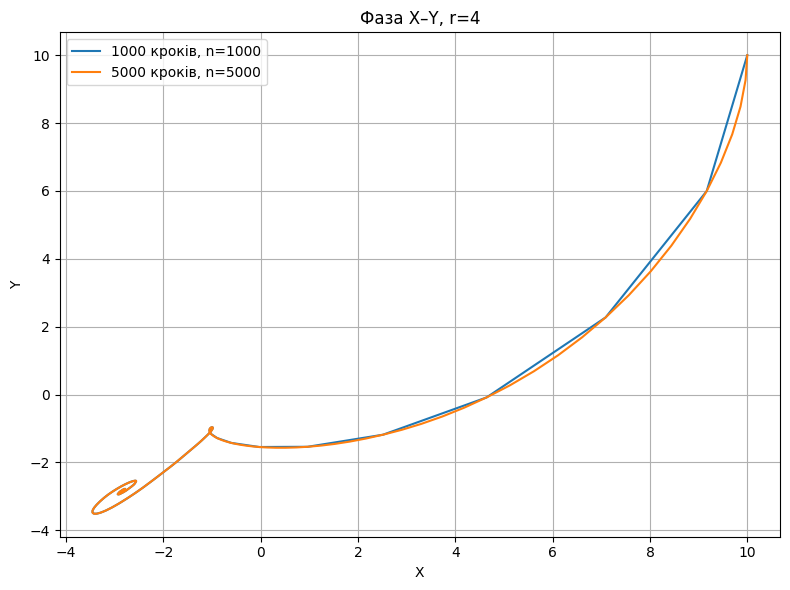

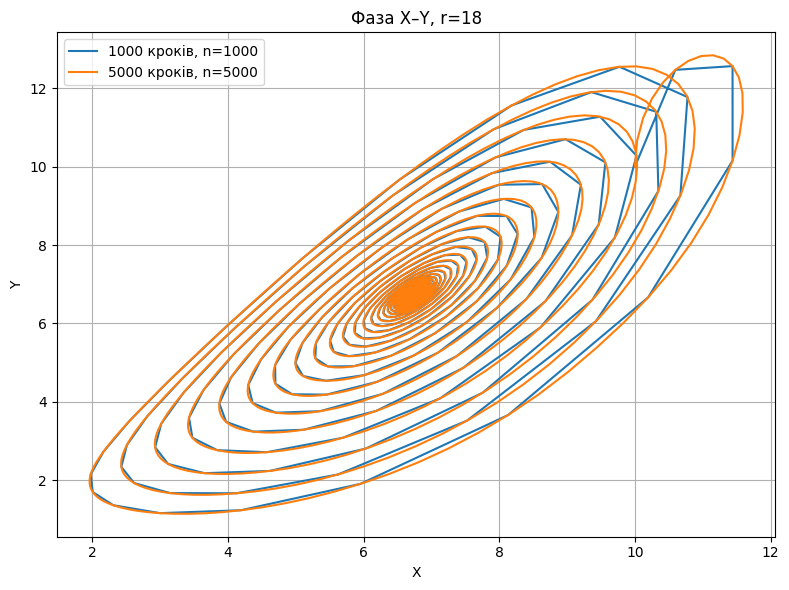

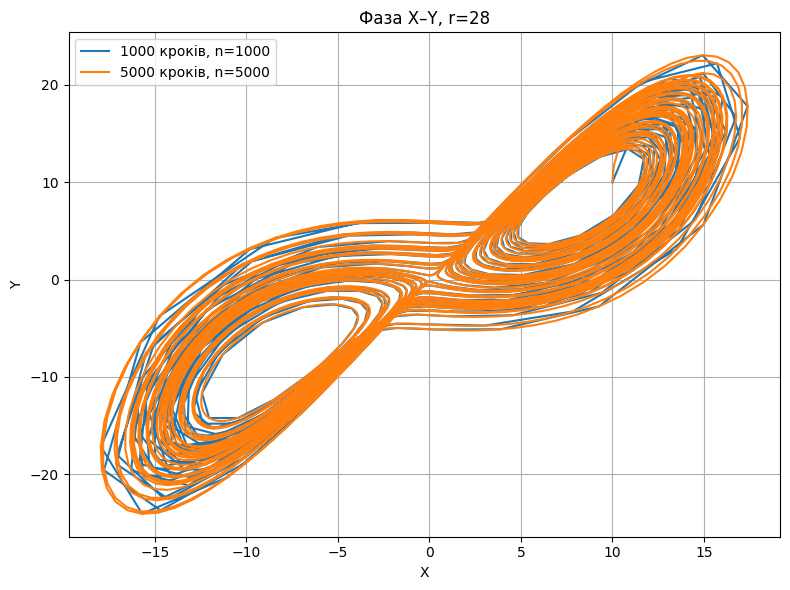

In [58]:
for r in r_values_from_journal:

    fig, ax = plt.subplots(figsize=(8, 6))

    for n, label in cases:
        t, x, y, z = solve_lorenz(n)
        ax.plot(x, y, label=f"{label}, n={n}")

    ax.set_title(f"Фаза X–Y, r={r}")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.legend()
    ax.grid()

    plt.tight_layout()
    plt.show()

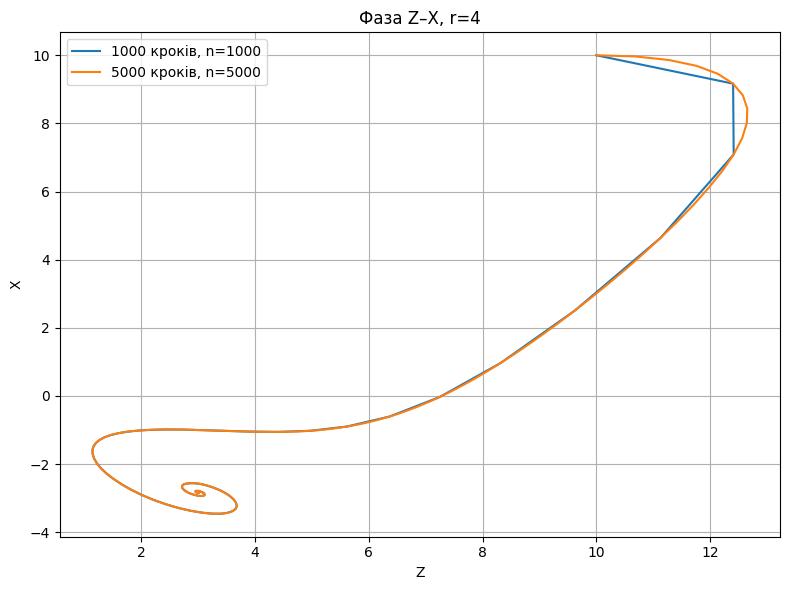

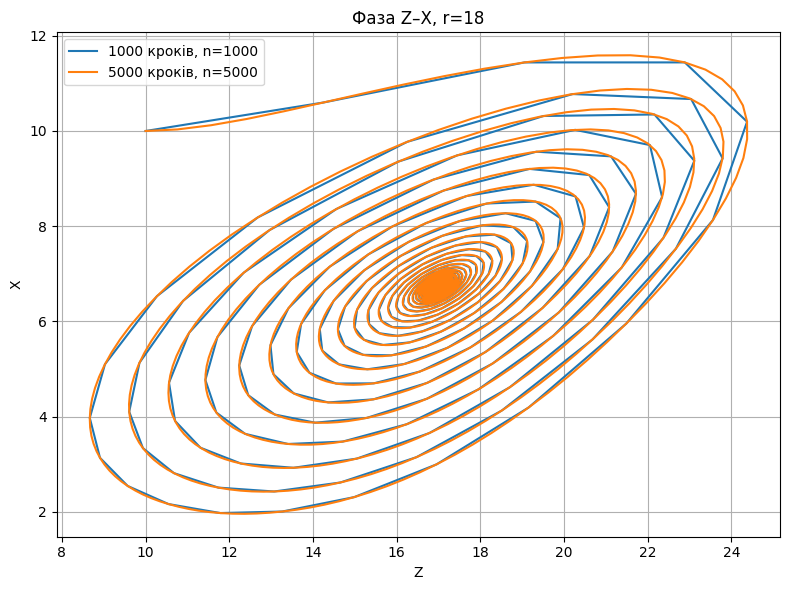

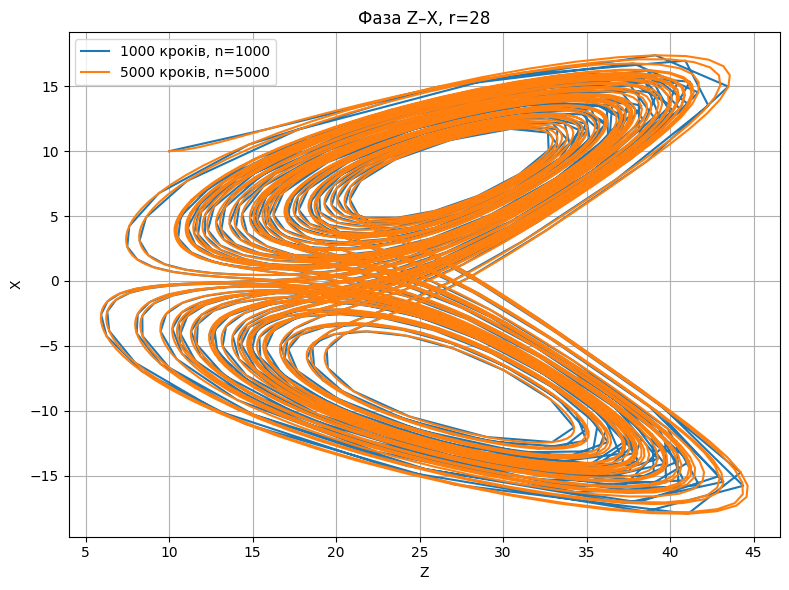

In [59]:
for r in r_values_from_journal:
    fig, ax = plt.subplots(figsize=(8, 6))

    for n, label in cases:
        t, x, y, z = solve_lorenz(n)
        ax.plot(z, x, label=f"{label}, n={n}")

    ax.set_title(f"Фаза Z–X, r={r}")
    ax.set_xlabel("Z")
    ax.set_ylabel("X")
    ax.legend()
    ax.grid()

    plt.tight_layout()
    plt.show()


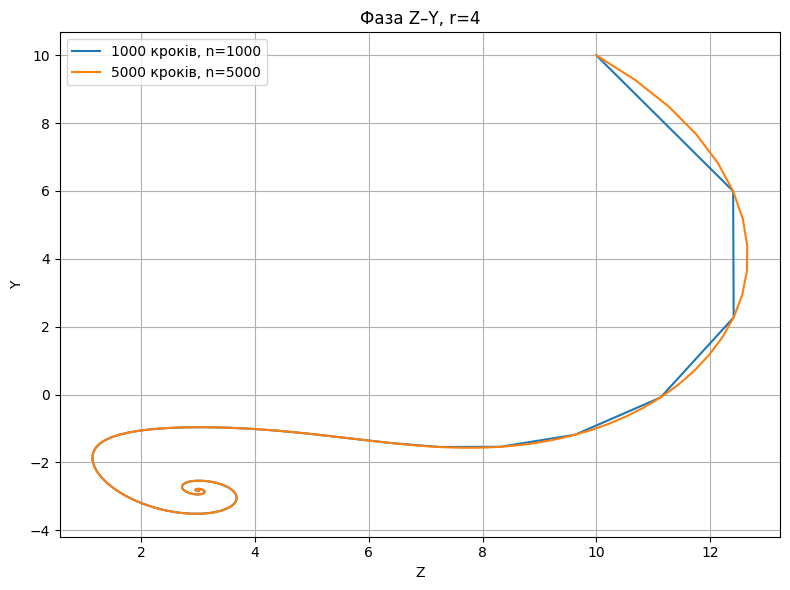

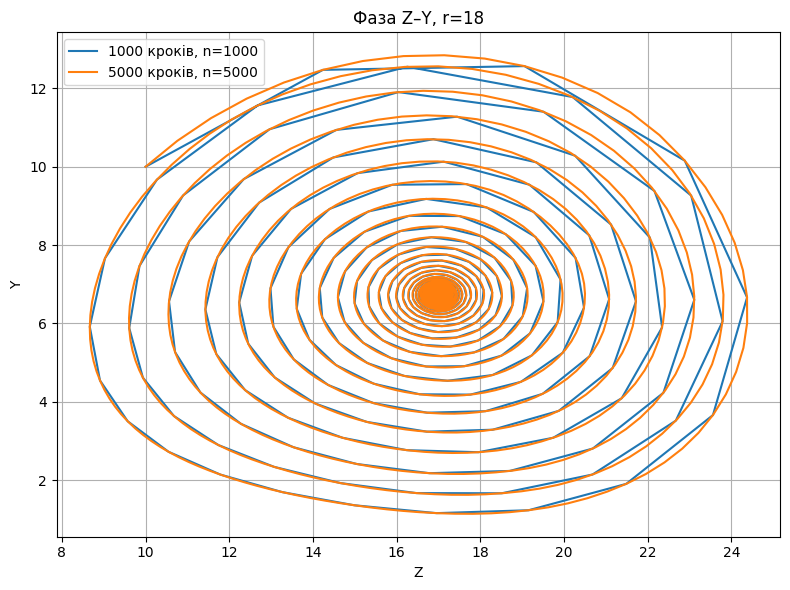

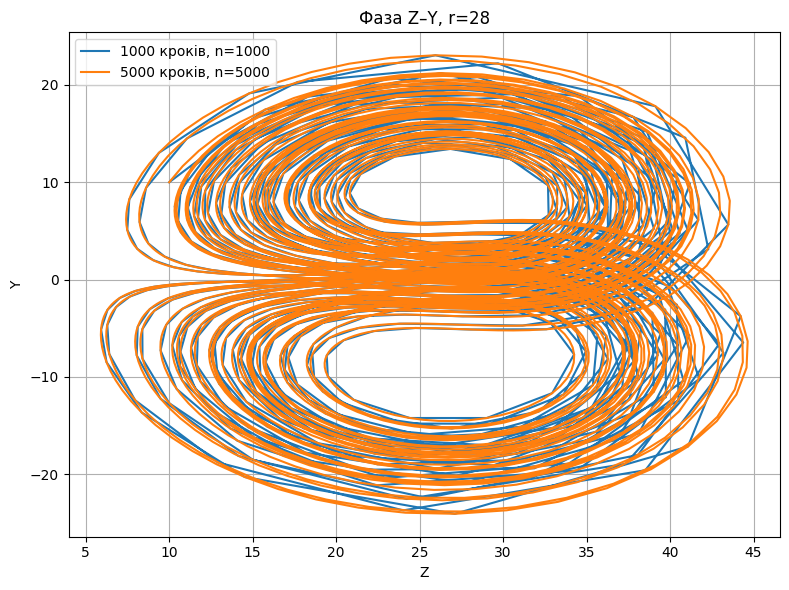

In [60]:
for r in r_values_from_journal:
    fig, ax = plt.subplots(figsize=(8, 6))

    for n, label in cases:
        t, x, y, z = solve_lorenz(n)
        ax.plot(z, y, label=f"{label}, n={n}")

    ax.set_title(f"Фаза Z–Y, r={r}")
    ax.set_xlabel("Z")
    ax.set_ylabel("Y")
    ax.legend()
    ax.grid()

    plt.tight_layout()
    plt.show()


Використовуючи засоби символьного обчислення та вбудовані функції Пітону знайти координати особливих точок системи (1) в символьному та чисельному вигляді.

In [61]:
import sympy as sp

x, y, z = sp.symbols('x y z', real=True)
sigma = 10
b = 8/3
r_values_from_journal = [4, 18, 28]

for r in r_values_from_journal:
    print(f"\n--- r = {r} ---")
    eq1 = sigma * (y - x)
    eq2 = r*x - y - x*z
    eq3 = x*y - b*z

    # Символьне розв'язання
    sol = sp.solve([eq1, eq2, eq3], (x, y, z), dict=True)
    print("Символьні координати стаціонарних точок:")
    for s in sol:
        print(s)

    # Чисельне наближення
    print("\nЧисельні координати:")
    for s in sol:
        num_coords = {var: sp.N(val) for var, val in s.items()}
        print(num_coords)



--- r = 4 ---
Символьні координати стаціонарних точок:
{x: -2.82842712474619, y: -2.82842712474619, z: 3.00000000000000}
{x: 0.0, y: 0.0, z: 0.0}
{x: 2.82842712474619, y: 2.82842712474619, z: 3.00000000000000}

Чисельні координати:
{x: -2.82842712474619, y: -2.82842712474619, z: 3.00000000000000}
{x: 0, y: 0, z: 0}
{x: 2.82842712474619, y: 2.82842712474619, z: 3.00000000000000}

--- r = 18 ---
Символьні координати стаціонарних точок:
{x: -6.73300329224138, y: -6.73300329224138, z: 17.0000000000000}
{x: 0.0, y: 0.0, z: 0.0}
{x: 6.73300329224138, y: 6.73300329224138, z: 17.0000000000000}

Чисельні координати:
{x: -6.73300329224138, y: -6.73300329224138, z: 17.0000000000000}
{x: 0, y: 0, z: 0}
{x: 6.73300329224138, y: 6.73300329224138, z: 17.0000000000000}

--- r = 28 ---
Символьні координати стаціонарних точок:
{x: -8.48528137423857, y: -8.48528137423857, z: 27.0000000000000}
{x: 0.0, y: 0.0, z: 0.0}
{x: 8.48528137423857, y: 8.48528137423857, z: 27.0000000000000}

Чисельні координати:
{

Для класичних значень параметрів сигма = 10, в=8/3 визначити тип особливої точки O(0,0,0) для значення параметру управління а)r = 24 - k
б)r = 0.7k

In [62]:
sigma = 10
b = 8/3

k = 3
r_values_for_task_4 = [24 - k, 0.7*k]

for r in r_values_for_task_4:
    J = sp.Matrix([[-sigma, sigma, 0],
                   [r, -1, 0],
                   [0, 0, -b]])

    eigs = J.eigenvals()
    print(f"\nr = {r}")
    for val, mult in eigs.items():
        print(f"λ = {val.evalf()}, кратність = {mult}")


r = 21
λ = -20.6739909054935, кратність = 1
λ = 9.67399090549352, кратність = 1
λ = -2.66666666666667, кратність = 1

r = 2.0999999999999996
λ = -11.9226162893326, кратність = 1
λ = 0.922616289332564, кратність = 1
λ = -2.66666666666667, кратність = 1


r = 21 = нестійке сідло, траєкторії відштовхуються у напрямку λ₂ і притягуються по λ₁ та λ₃.

r = 2.1 = нестійке сідло, але слабше нестійке (додатнє λ₂ ≈ 0.92 менше, ніж для r=21).

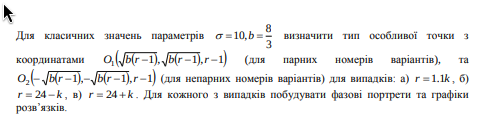

In [63]:
import sympy as sp
import math
x, y, z = sp.symbols('x y z', real=True)
sigma = 10
b = 8/3
r_values_for_task_5 = [1.13, 21]
for r in r_values_for_task_5:
    J = sp.Matrix([[-sigma, sigma, 0],
                   [r-r+1, -1, - math.sqrt(b*(r-1))],
                   [math.sqrt(b*(r-1)), math.sqrt(b*(r-1)), -b]])

    eigs = J.eigenvals()
    print(f"\nr = {r}")
    for val, mult in eigs.items():
        print(f"λ = {val.evalf()}, кратність = {mult}")


r = 1.13
λ = -11.0336695209671, кратність = 1
λ = -0.265409210514427, кратність = 1
λ = -2.36758793518518, кратність = 1

r = 21
λ = -0.120009786566423 - 8.91232888833214*I, кратність = 1
λ = -13.4266470935338 + 1.78631586325684e-63*I, кратність = 1
λ = -0.120009786566423 + 8.91232888833214*I, кратність = 1


In [64]:
import sympy as sp
import math
x, y, z = sp.symbols('x y z', real=True)
sigma = 10
b = 8/3
r_values_for_task_5 = [1.13, 21]
for r in r_values_for_task_5:
    J = sp.Matrix([[-sigma, sigma, 0],
                   [r-r+1, -1, math.sqrt(b*(r-1))],
                   [-math.sqrt(b*(r-1)), -math.sqrt(b*(r-1)), -b]])

    eigs = J.eigenvals()
    print(f"\nr = {r}")
    for val, mult in eigs.items():
        print(f"λ = {val.evalf()}, кратність = {mult}")


r = 1.13
λ = -11.0336695209671, кратність = 1
λ = -0.265409210514427, кратність = 1
λ = -2.36758793518518, кратність = 1

r = 21
λ = -0.120009786566423 - 8.91232888833214*I, кратність = 1
λ = -13.4266470935338 + 1.78631586325684e-63*I, кратність = 1
λ = -0.120009786566423 + 8.91232888833214*I, кратність = 1


In [65]:
def equilibrium_points_labeled(r, b=8/3):
    if r <= 1:
        return [("O", 0, 0, 0)]
    R = math.sqrt(b * (r - 1))
    return [
        ("O",   0,  0,  0),
        ("C+",  R,  R, r - 1),
        ("C-", -R, -R, r - 1)
    ]

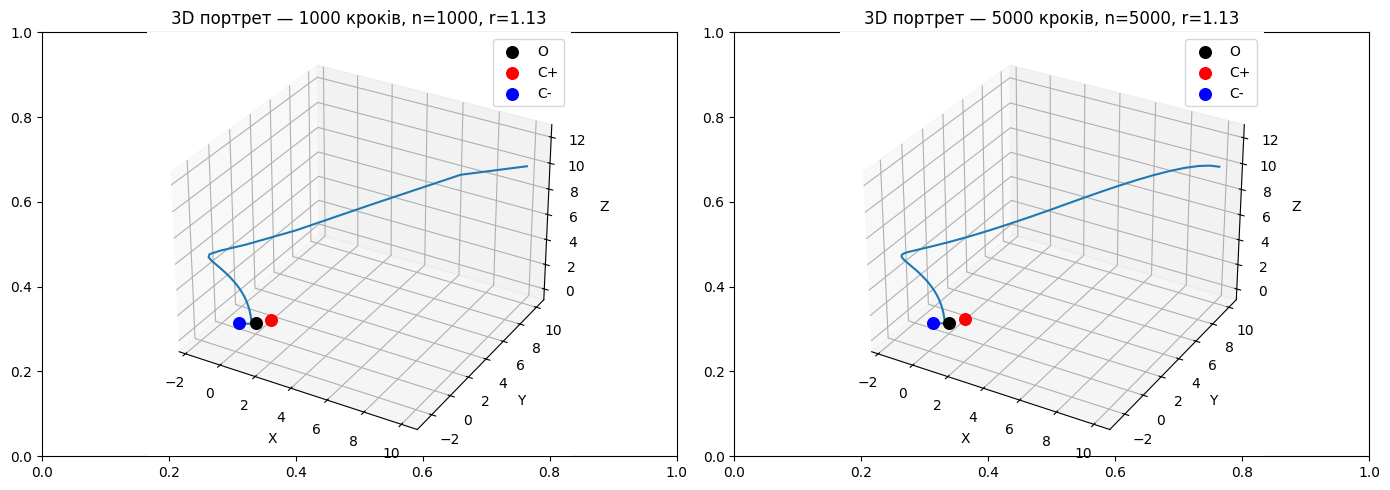

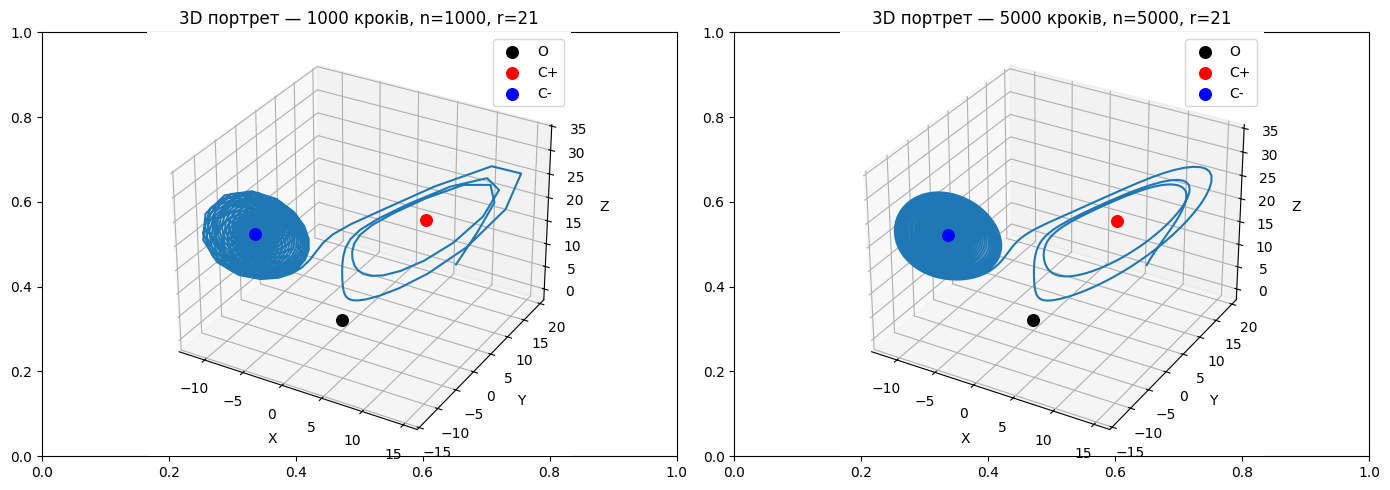

In [66]:
for r in r_values_for_task_5:
    def lorenz(t, v):
        x, y, z = v
        dx = -sigma*x + sigma*y
        dy = -x*z + r*x - y
        dz = x*y - b*z
        return [dx, dy, dz]

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

     # --- 1000 кроків ---
    n1, label1 = cases[0]
    t1_sol, x1, y1, z1 = solve_lorenz(n1)

    ax1 = fig.add_subplot(1, 2, 1, projection="3d")
    ax1.plot(x1, y1, z1)
    ax1.set_title(f"3D портрет — {label1}, n={n1}, r={r}")
    ax1.set_xlabel("X")
    ax1.set_ylabel("Y")
    ax1.set_zlabel("Z")

    # --- 5000 кроків ---
    n2, label2 = cases[1]
    t2_sol, x2, y2, z2 = solve_lorenz(n2)

    ax2 = fig.add_subplot(1, 2, 2, projection="3d")
    ax2.plot(x2, y2, z2)
    ax2.set_title(f"3D портрет — {label2}, n={n2}, r={r}")
    ax2.set_xlabel("X")
    ax2.set_ylabel("Y")
    ax2.set_zlabel("Z")

    # --- стаціонарні точки ---
    points = equilibrium_points_labeled(r)

    colors = {"O": "black", "C+": "red", "C-": "blue"}

    for name, px, py, pz in points:
          ax1.scatter(px, py, pz, color=colors[name], s=70, label=name)
          ax2.scatter(px, py, pz, color=colors[name], s=70, label=name)

    ax1.legend()
    ax2.legend()
    plt.tight_layout()
    plt.show()

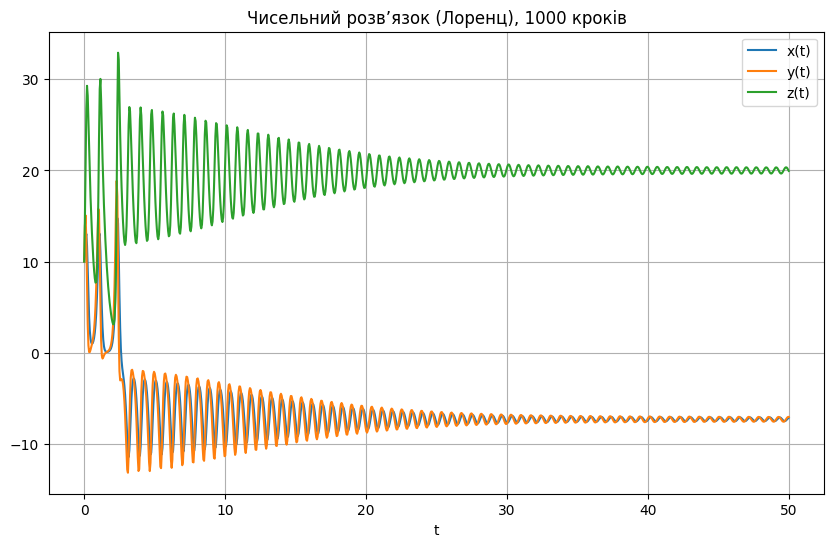

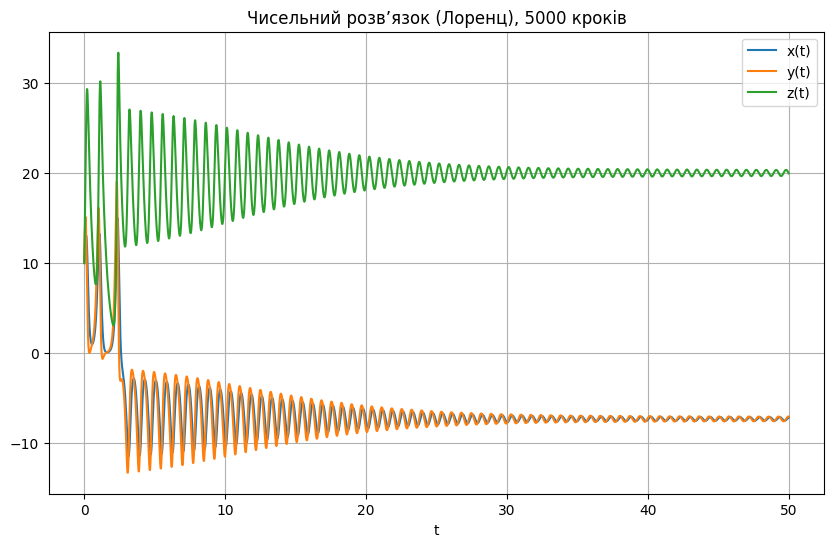

In [67]:
for n, label in cases:
    t, x, y, z = solve_lorenz(n)

    # --- Графіки X(t), Y(t), Z(t) ---
    plt.figure(figsize=(10, 6))
    plt.plot(t, x, label="x(t)")
    plt.plot(t, y, label="y(t)")
    plt.plot(t, z, label="z(t)")
    plt.title(f"Чисельний розв’язок (Лоренц), {label}")
    plt.xlabel("t")
    plt.legend()
    plt.grid()
    plt.show()

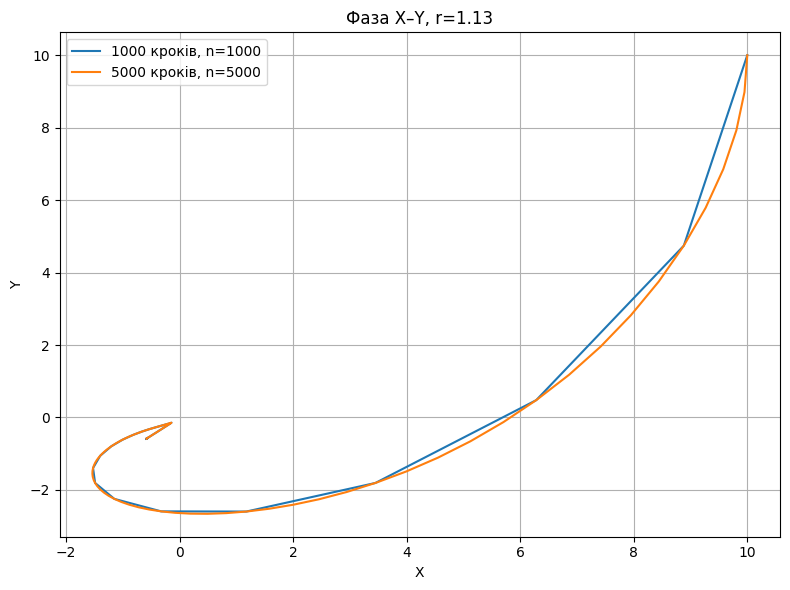

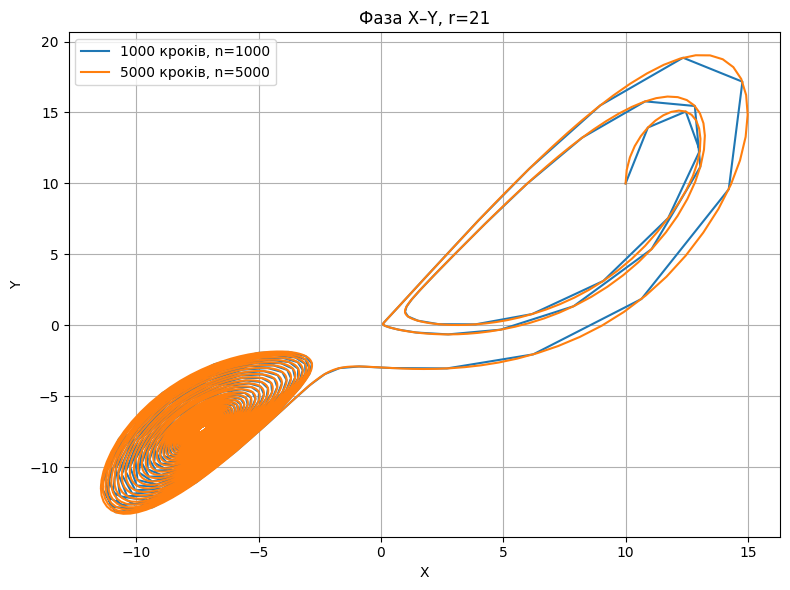

In [68]:
for r in r_values_for_task_5:

    fig, ax = plt.subplots(figsize=(8, 6))

    for n, label in cases:
        t, x, y, z = solve_lorenz(n)
        ax.plot(x, y, label=f"{label}, n={n}")

    ax.set_title(f"Фаза X–Y, r={r}")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.legend()
    ax.grid()

    plt.tight_layout()
    plt.show()

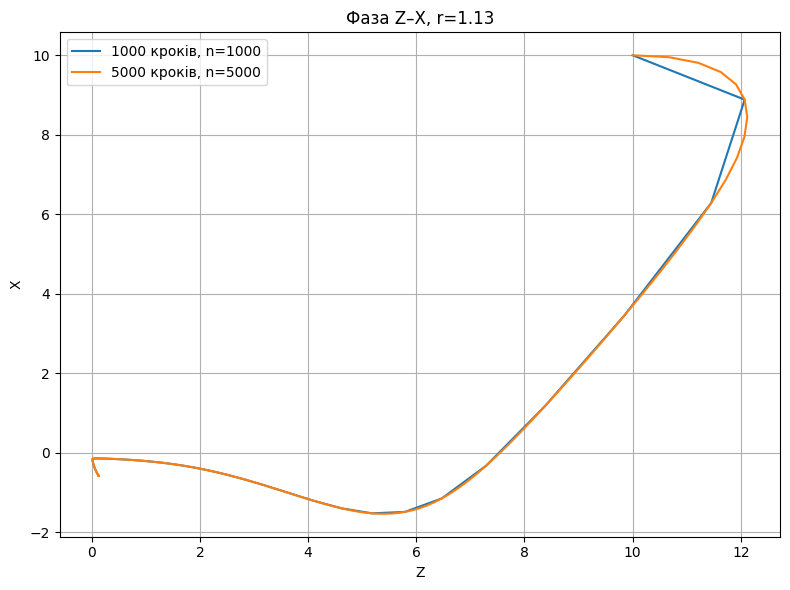

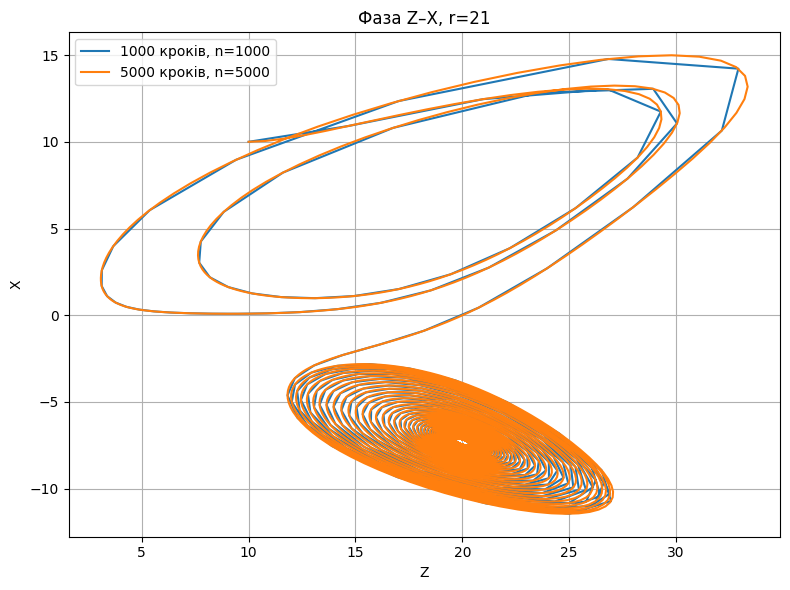

In [69]:
for r in r_values_for_task_5:
    fig, ax = plt.subplots(figsize=(8, 6))

    for n, label in cases:
        t, x, y, z = solve_lorenz(n)
        ax.plot(z, x, label=f"{label}, n={n}")

    ax.set_title(f"Фаза Z–X, r={r}")
    ax.set_xlabel("Z")
    ax.set_ylabel("X")
    ax.legend()
    ax.grid()

    plt.tight_layout()
    plt.show()

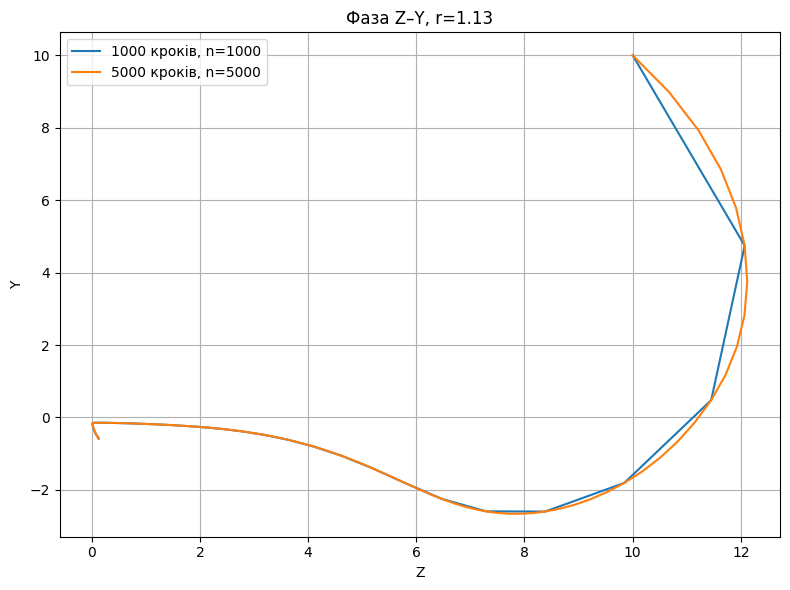

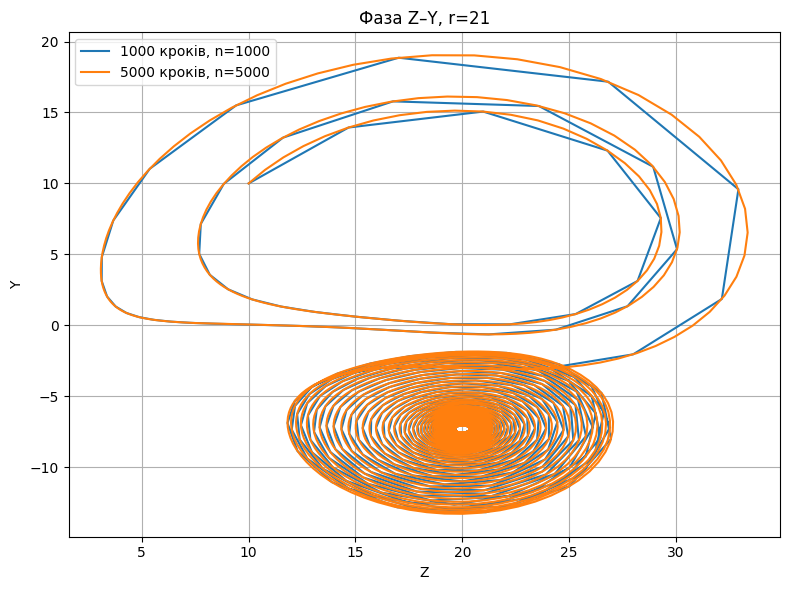

In [70]:
for r in r_values_for_task_5:
    fig, ax = plt.subplots(figsize=(8, 6))

    for n, label in cases:
        t, x, y, z = solve_lorenz(n)
        ax.plot(z, y, label=f"{label}, n={n}")

    ax.set_title(f"Фаза Z–Y, r={r}")
    ax.set_xlabel("Z")
    ax.set_ylabel("Y")
    ax.legend()
    ax.grid()

    plt.tight_layout()
    plt.show()

Для значень параметрів сігма = 10+k, b=k
обчислити критичне значення параметру r_c, при якому точки O1, O2 втрачають стійкість і в системі існує єдиний атрактор – атрактор
Лоренця. Побудувати графіки розв’язків та фазові портрети для випадку 0.9*r_c, 1.1*r_c

In [71]:
%reset -f

In [72]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [73]:
k = 3
sigma = 10+k
b = k
cases = [(1000, "1000 кроків"), (5000, "5000 кроків")]

def r_critical(sigma, b):
    return sigma * (sigma + b + 3) / (sigma - b - 1)

rc = r_critical(sigma, b)
print("r_c =", float(rc))
print("0.9 * r_c =", float(0.9 * rc))
print("1.1 * r_c =", float(1.1 * rc))

r_c = 27.444444444444443
0.9 * r_c = 24.7
1.1 * r_c = 30.18888888888889


In [74]:
def lorenz(t, v, sigma, b, r):
    x, y, z = v
    dx = -sigma*x + sigma*y
    dy = -x*z + r*x - y
    dz = x*y - b*z
    return [dx, dy, dz]

def solve_lorenz(n_steps, sigma, b, r, t_max=50):
    t = np.linspace(0, t_max, n_steps)
    sol = solve_ivp(lambda t, v: lorenz(t, v, sigma, b, r),
                    [0, t_max],
                    [1, 1, 1],
                    t_eval=t)
    x, y, z = sol.y
    return t, x, y, z

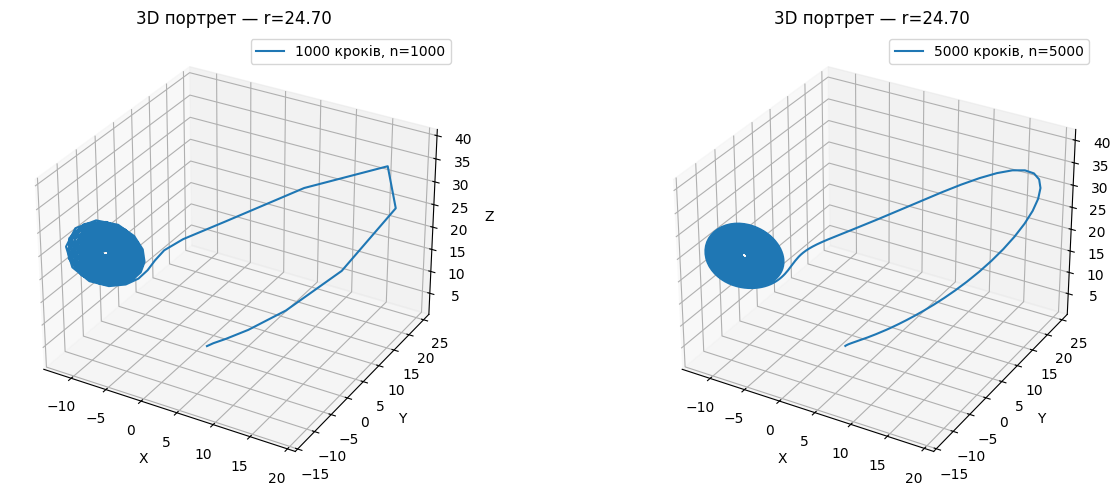

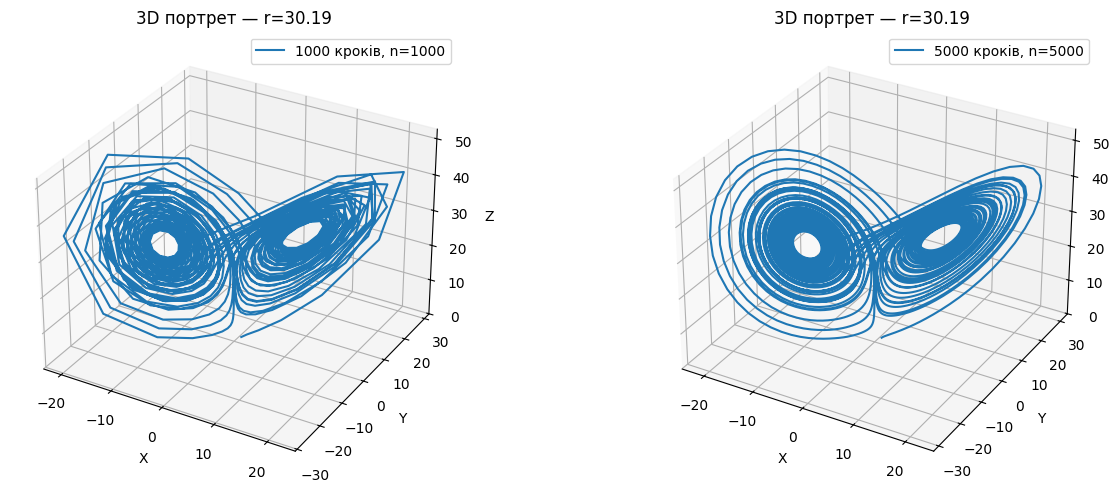

In [75]:
r_values_for_task_6 = [0.9 * rc, 1.1 * rc]

for r in r_values_for_task_6:

    n1, label1 = cases[0]
    t1, x1, y1, z1 = solve_lorenz(n1, sigma, b, r)

    n2, label2 = cases[1]
    t2, x2, y2, z2 = solve_lorenz(n2, sigma, b, r)

    fig, axes = plt.subplots(1, 2, figsize=(14, 5), subplot_kw={'projection': '3d'})

    axes[0].plot(x1, y1, z1, label=f"{label1}, n={n1}")
    axes[0].set_title(f"3D портрет — r={r:.2f}")
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
    axes[0].set_zlabel("Z")
    axes[0].legend()

    axes[1].plot(x2, y2, z2, label=f"{label2}, n={n2}")
    axes[1].set_title(f"3D портрет — r={r:.2f}")
    axes[1].set_xlabel("X")
    axes[1].set_ylabel("Y")
    axes[1].set_zlabel("Z")
    axes[1].legend()

    plt.tight_layout()
    plt.show()

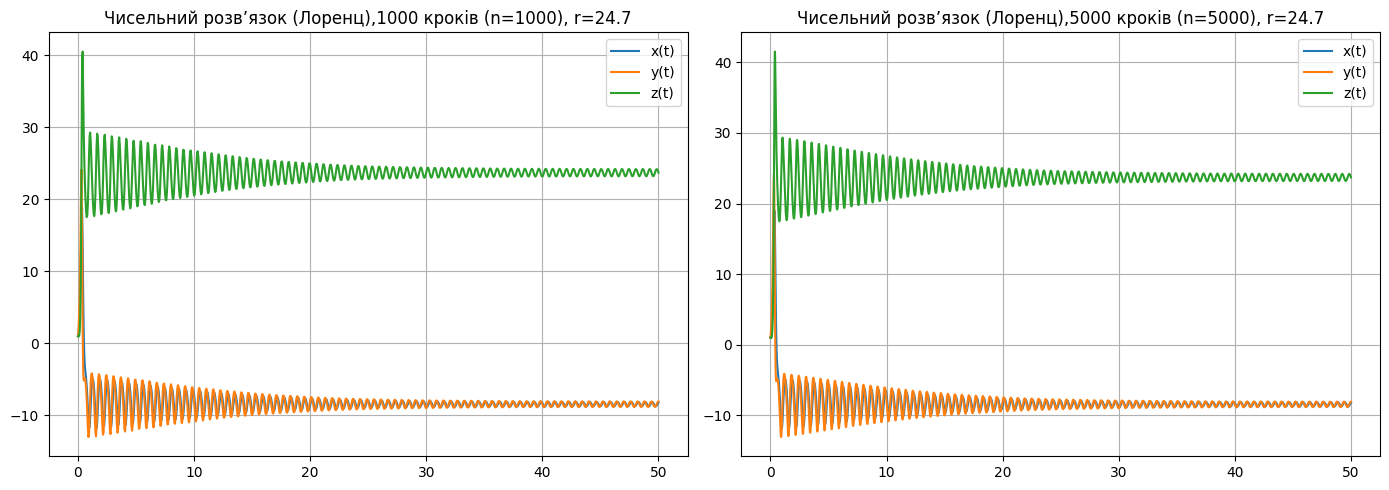

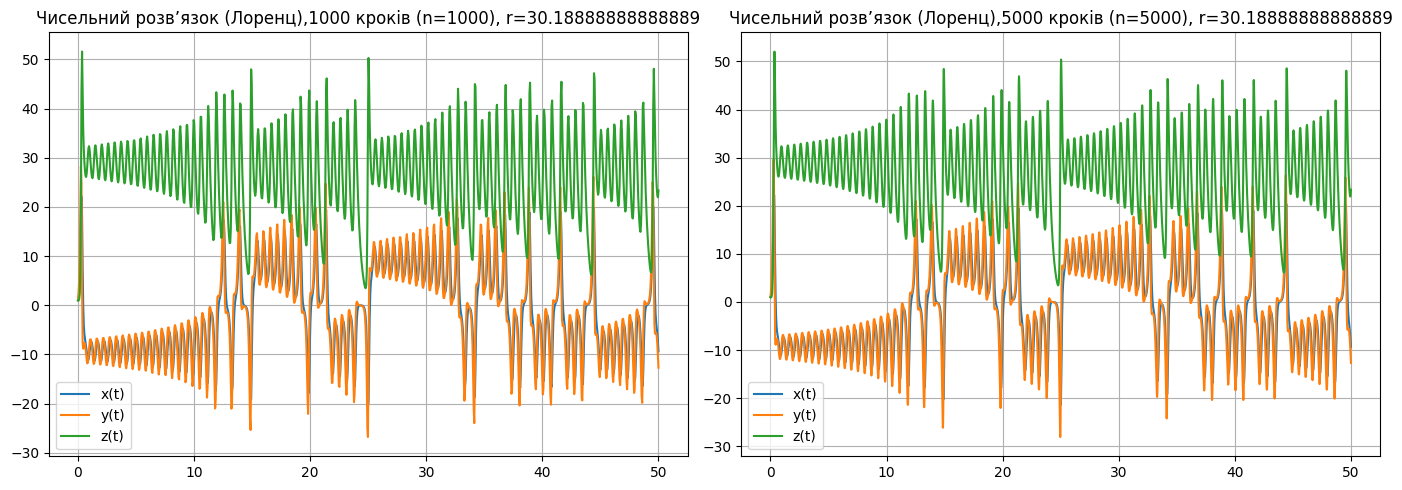

In [76]:
for r in r_values_for_task_6:

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # --- 1000 кроків ---
    n, label = cases[0]
    t, x, y, z = solve_lorenz(n, sigma, b, r)
    axes[0].plot(t, x, label="x(t)")
    axes[0].plot(t, y, label="y(t)")
    axes[0].plot(t, z, label="z(t)")
    axes[0].set_title(f"Чисельний розв’язок (Лоренц),{label} (n={n}), r={r}")
    axes[0].grid()
    axes[0].legend()

    # --- 5000 кроків ---
    n, label = cases[1]
    t, x, y, z = solve_lorenz(n, sigma, b, r)
    axes[1].plot(t, x, label="x(t)")
    axes[1].plot(t, y, label="y(t)")
    axes[1].plot(t, z, label="z(t)")
    axes[1].set_title(f"Чисельний розв’язок (Лоренц),{label} (n={n}), r={r}")
    axes[1].grid()
    axes[1].legend()

    plt.tight_layout()
    plt.show()

Дослідити систему на чутливість до початкових умов. Для цього для класичних значень
параметрів побудувати графіки розв’язків для початкових умов x1=1, y1=1, z1=1; x2=1,
y2=1.00000k, z2=1.

In [77]:
sigma = 10
b = 8/3
r = 28
delta = 1e-5 * k
n_steps = 5000


x1, y1, z1 = 1, 1, 1
x2, y2, z2 = 1, 1 + delta, 1

In [78]:
def solve_lorenz_custom_for_task_7(n_steps, sigma, b, r, x0, y0, z0, t_max=50):
    t = np.linspace(0, t_max, n_steps)
    def lorenz(t, v):
        x, y, z = v
        dx = -sigma*x + sigma*y
        dy = -x*z + r*x - y
        dz = x*y - b*z
        return [dx, dy, dz]
    sol = solve_ivp(lorenz, [0, t_max], [x0, y0, z0], t_eval=t)
    x, y, z = sol.y
    return t, x, y, z


In [79]:
# інтегрування
t, x1_sol, y1_sol, z1_sol = solve_lorenz_custom_for_task_7(n_steps, sigma, b, r, x1, y1, z1)
t, x2_sol, y2_sol, z2_sol = solve_lorenz_custom_for_task_7(n_steps, sigma, b, r, x2, y2, z2)

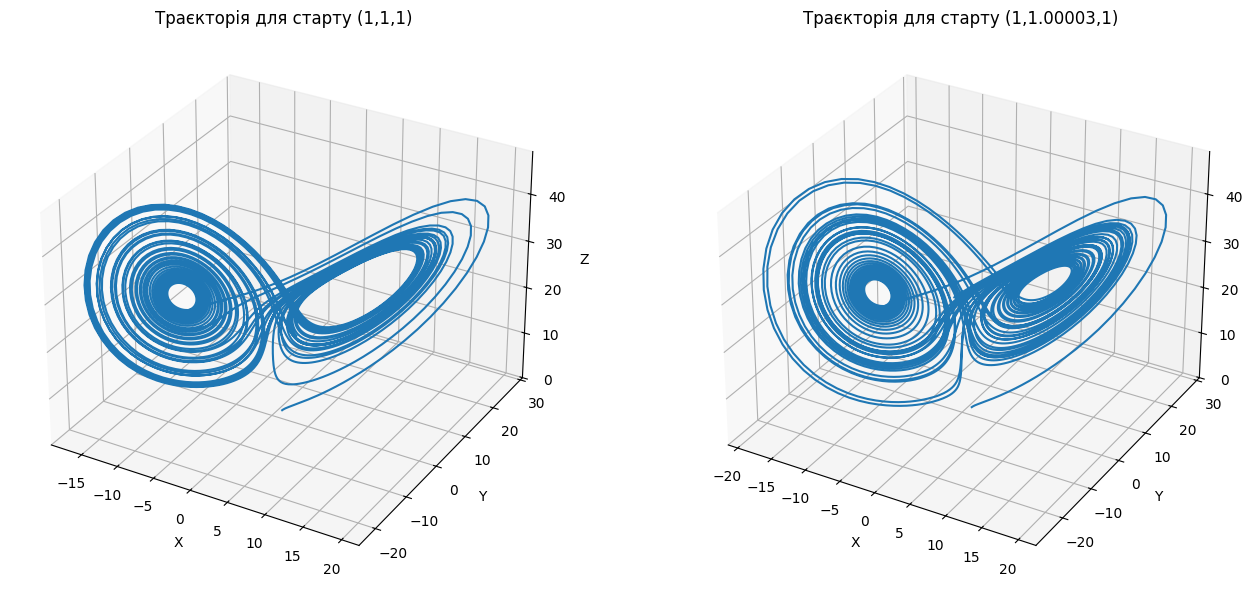

In [80]:
fig, axes = plt.subplots(1, 2, figsize=(14,6), subplot_kw={'projection':'3d'})

axes[0].plot(x1_sol, y1_sol, z1_sol)
axes[0].set_title(f"Траєкторія для старту (1,1,1)")
axes[0].set_xlabel("X")
axes[0].set_ylabel("Y")
axes[0].set_zlabel("Z")

axes[1].plot(x2_sol, y2_sol, z2_sol)
axes[1].set_title(f"Траєкторія для старту (1,{y2:.5f},1)")
axes[1].set_xlabel("X")
axes[1].set_ylabel("Y")
axes[1].set_zlabel("Z")

plt.tight_layout()
plt.show()


траєкторії починають сильно розходитися через малу зміну початкових умов.

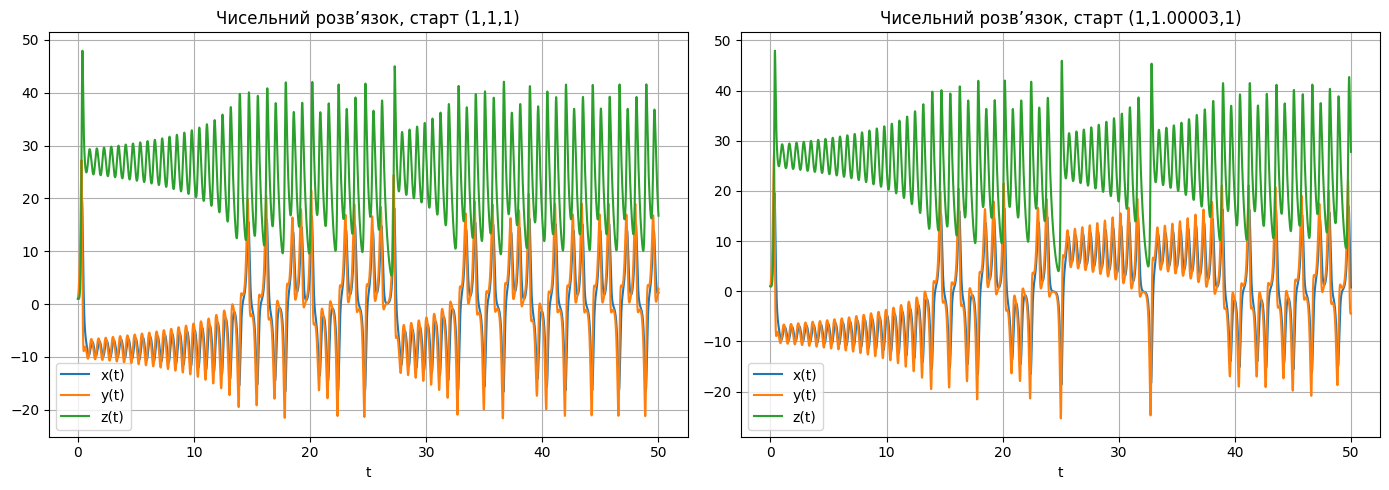

In [81]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# --- перша початкова умова ---
axes[0].plot(t, x1_sol, label="x(t)")
axes[0].plot(t, y1_sol, label="y(t)")
axes[0].plot(t, z1_sol, label="z(t)")
axes[0].set_title(f"Чисельний розв’язок, старт (1,1,1)")
axes[0].set_xlabel("t")
axes[0].grid()
axes[0].legend()

# --- друга початкова умова ---
axes[1].plot(t, x2_sol, label="x(t)")
axes[1].plot(t, y2_sol, label="y(t)")
axes[1].plot(t, z2_sol, label="z(t)")
axes[1].set_title(f"Чисельний розв’язок, старт (1,{y2:.5f},1)")
axes[1].set_xlabel("t")
axes[1].grid()
axes[1].legend()

plt.tight_layout()
plt.show()

Використовуючи елемент управління Slider дослідити динаміку системи для класичних
значень параметрів сигма=10, б=8/3 з побудовою фазових портретів та графіків розв’язків для великих значень параметру
r

а) 99<=r<=100

b) 165-k<=r<=167+k

c) r=315+k

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from ipywidgets import interact

In [83]:
sigma = 10
b = 8/3
x0, y0, z0 = 1, 1, 1

def solve_lorenz(sigma, b, r, t_max=50, n_steps=5000):
    t = np.linspace(0, t_max, n_steps)
    sol = solve_ivp(lambda t, v: lorenz(t, v, sigma, b, r),
                    [0, t_max],
                    [x0, y0, z0],
                    t_eval=t)
    return t, sol.y[0], sol.y[1], sol.y[2]

interactive(children=(FloatSlider(value=99.5, description='r', min=99.0, step=0.01), Output()), _dom_classes=(…

interactive(children=(FloatSlider(value=166.0, description='r', max=170.0, min=162.0, step=0.01), Output()), _…

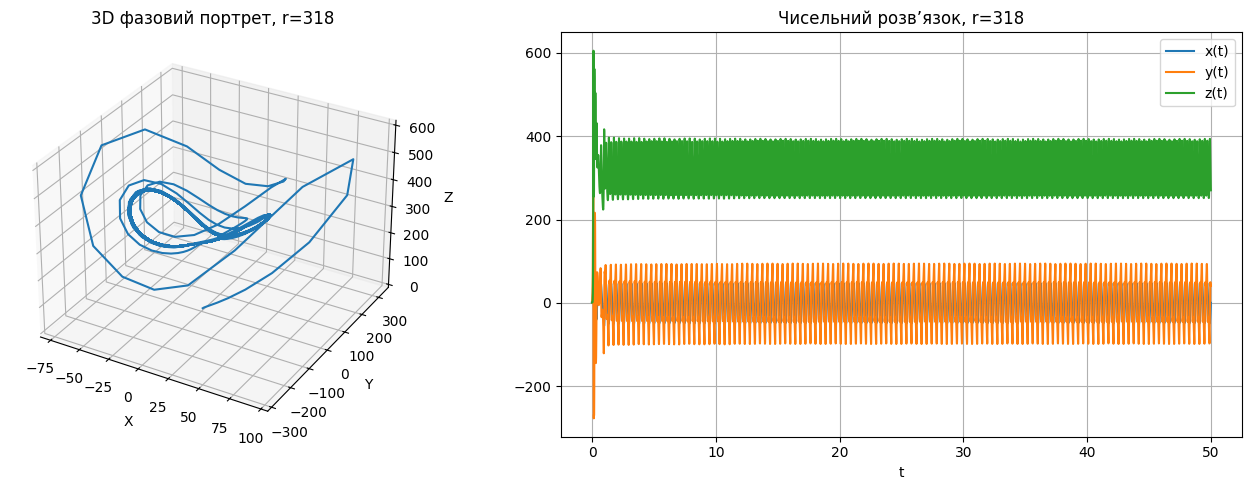

In [84]:
def plot_lorenz(r):
    t, x, y, z = solve_lorenz(sigma, b, r)

    fig = plt.figure(figsize=(14,5))

    # 3D фазовий портрет
    ax1 = fig.add_subplot(1,2,1, projection='3d')
    ax1.plot(x, y, z)
    ax1.set_title(f"3D фазовий портрет, r={r}")
    ax1.set_xlabel("X")
    ax1.set_ylabel("Y")
    ax1.set_zlabel("Z")

    # Графіки x(t), y(t), z(t)
    ax2 = fig.add_subplot(1,2,2)
    ax2.plot(t, x, label="x(t)")
    ax2.plot(t, y, label="y(t)")
    ax2.plot(t, z, label="z(t)")
    ax2.set_title(f"Чисельний розв’язок, r={r}")
    ax2.set_xlabel("t")
    ax2.grid()
    ax2.legend()

    plt.tight_layout()
    plt.show()

# a) 99 <= r <= 100
interact(plot_lorenz, r=(99.0, 100.0, 0.01))

# b) 165-k <= r <= 167+k
k = 3
interact(plot_lorenz, r=(165-k, 167+k, 0.01))

# c) r = 315+k
plot_lorenz(315+k)